# ⚫ Model Building

# Importing Libraries

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# RGB Original Dataset Model

# Defining the directories for training and testing data

In [39]:

train_dir = r'C:\IP\archive (1)\melanoma_cancer_dataset\train'
test_dir = r'C:\IP\archive (1)\melanoma_cancer_dataset\test'

# Image data generator with data augmentation for the training set

In [40]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Rescaling and Loading images in batches from the directories

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary' 
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 9579 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


# Building a CNN model

In [ ]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  
])

c:\IP\my_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the model

In [43]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture

In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,601,153 (9.92 MB)

 Trainable params: 2,601,153 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [45]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)

Epoch 1/5


c:\IP\my_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


300/300 ━━━━━━━━━━━━━━━━━━━━ 45s 146ms/step - accuracy: 0.6501 - loss: 0.6051 - val_accuracy: 0.8448 - val_loss: 0.3771
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 37s 124ms/step - accuracy: 0.8037 - loss: 0.4138 - val_accuracy: 0.8989 - val_loss: 0.2875
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 37s 124ms/step - accuracy: 0.8547 - loss: 0.3349 - val_accuracy: 0.8929 - val_loss: 0.2585
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 37s 125ms/step - accuracy: 0.8687 - loss: 0.3054 - val_accuracy: 0.9039 - val_loss: 0.2521
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 42s 140ms/step - accuracy: 0.8734 - loss: 0.2953 - val_accuracy: 0.8939 - val_loss: 0.2584


# Evaluate the model on the test set

In [46]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8904 - loss: 0.2551
Test accuracy: 0.89


# Get true labels and predicted probabilities for the test set

In [ ]:
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()  


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


# Confusion Matrix

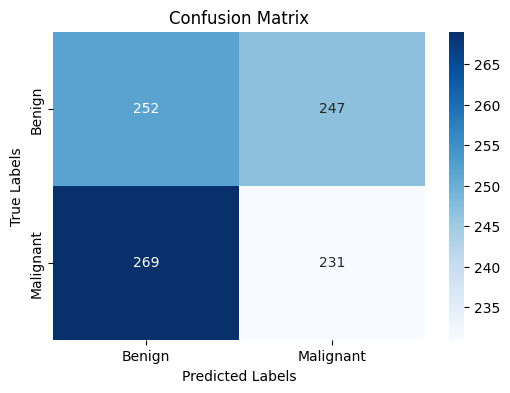

In [48]:
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# AUC and ROC Curve

AUC Score: 0.48


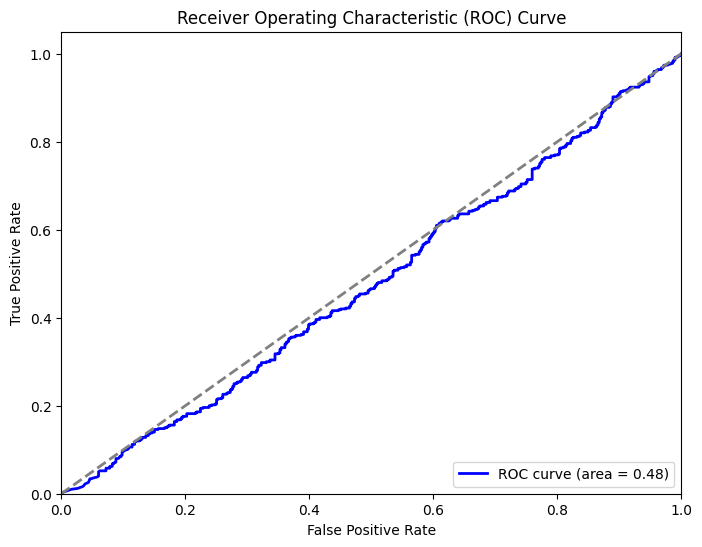

In [ ]:
auc_score = roc_auc_score(y_true, y_pred_probs)
print(f"AUC Score: {auc_score:.2f}")


fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [50]:
model.save("one.h5")

# Greyscale Original Dataset Model

In [1]:

train_dir = r'C:\IP\archive (1)\melanoma_cancer_dataset\train_grey'
test_dir = r'C:\IP\archive (1)\melanoma_cancer_dataset\test_grey'

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'  
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 9579 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


In [ ]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  
])

c:\IP\my_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,601,153 (9.92 MB)

 Trainable params: 2,601,153 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

c:\IP\my_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 112s 365ms/step - accuracy: 0.6896 - loss: 0.5547 - val_accuracy: 0.8278 - val_loss: 0.4245
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 90s 300ms/step - accuracy: 0.7998 - loss: 0.4329 - val_accuracy: 0.8539 - val_loss: 0.3212
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 66s 219ms/step - accuracy: 0.8185 - loss: 0.3740 - val_accuracy: 0.8699 - val_loss: 0.2900
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 68s 225ms/step - accuracy: 0.8254 - loss: 0.3723 - val_accuracy: 0.8779 - val_loss: 0.2951
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 68s 226ms/step - accuracy: 0.8228 - loss: 0.3740 - val_accuracy: 0.8859 - val_loss: 0.2770
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 123s 409ms/step - accuracy: 0.8372 - loss: 0.3526 - val_accuracy: 0.8799 - val_loss: 0.2752
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 110s 366ms/step - accuracy: 0.8431 - loss: 0.3433 - val_accuracy: 0.8859 - val_loss: 0.2573
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 69s 231ms/step - accuracy: 0.8419 - loss

In [10]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8794 - loss: 0.2829
Test accuracy: 0.89


In [ ]:
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()  


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step


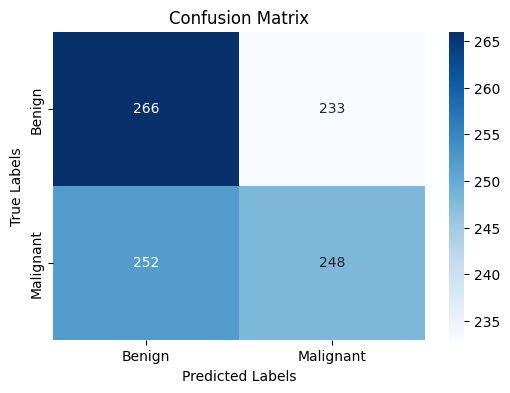

In [12]:
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

AUC Score: 0.53


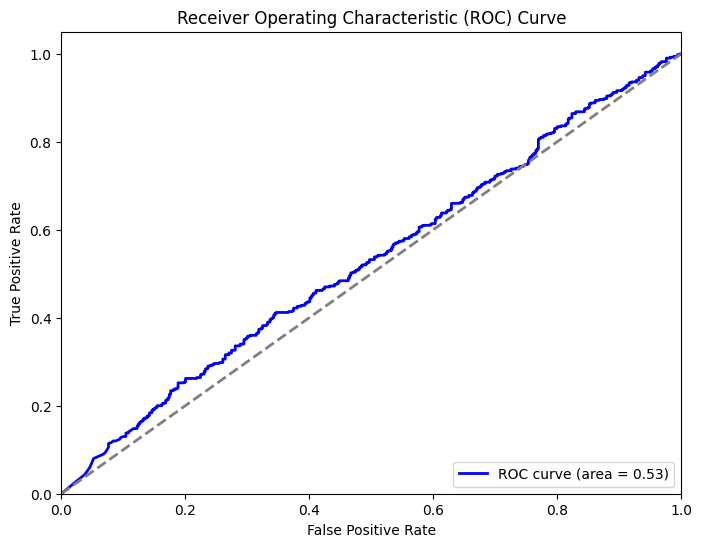

In [13]:
# Calculate AUC score
auc_score = roc_auc_score(y_true, y_pred_probs)
print(f"AUC Score: {auc_score:.2f}")

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Greyscale Augmented Dataset Model

In [3]:

train_dir = r'C:\IP\archive (1)\melanoma_cancer_dataset\train_augmented'
test_dir = r'C:\IP\archive (1)\melanoma_cancer_dataset\test_augmented'

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'  
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 47895 images belonging to 2 classes.
Found 4995 images belonging to 2 classes.


In [ ]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  
])

c:\IP\my_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,601,153 (9.92 MB)

 Trainable params: 2,601,153 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

c:\IP\my_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 352s 233ms/step - accuracy: 0.7237 - loss: 0.5112 - val_accuracy: 0.8551 - val_loss: 0.3170
Epoch 2/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 200s 134ms/step - accuracy: 0.8285 - loss: 0.3739 - val_accuracy: 0.8603 - val_loss: 0.3010
Epoch 3/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 199s 133ms/step - accuracy: 0.8420 - loss: 0.3491 - val_accuracy: 0.8725 - val_loss: 0.2874
Epoch 4/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 204s 136ms/step - accuracy: 0.8511 - loss: 0.3278 - val_accuracy: 0.8801 - val_loss: 0.2801
Epoch 5/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 195s 130ms/step - accuracy: 0.8523 - loss: 0.3306 - val_accuracy: 0.8777 - val_loss: 0.2727
Epoch 6/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 194s 130ms/step - accuracy: 0.8574 - loss: 0.3182 - val_accuracy: 0.8755 - val_loss: 0.2755
Epoch 7/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 199s 133ms/step - accuracy: 0.8631 - loss: 0.3101 - val_accuracy: 0.8791 - val_loss: 0.2666
Epoch 8/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 196s 131ms/step - ac

In [12]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')


157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.8772 - loss: 0.2934
Test accuracy: 0.88


In [ ]:
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()  

157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step


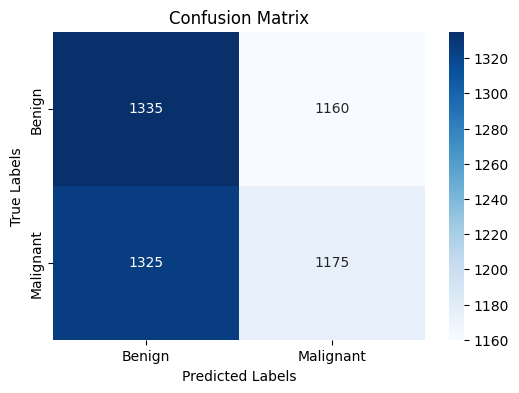

In [14]:
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

AUC Score: 0.52


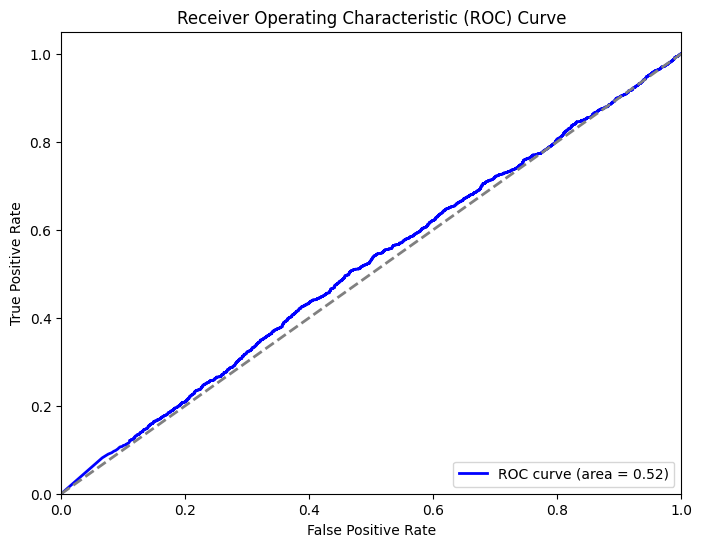

In [ ]:
auc_score = roc_auc_score(y_true, y_pred_probs)
print(f"AUC Score: {auc_score:.2f}")


fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# RGB Augmented Dataset Model

In [10]:

train_dir = r'C:\IP\archive (1)\melanoma_cancer_dataset\rgb_train_augmented'
test_dir = r'C:\IP\archive (1)\melanoma_cancer_dataset\rgb_test_augmented'

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'  
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 47895 images belonging to 2 classes.
Found 4995 images belonging to 2 classes.


In [ ]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid') 
])

c:\IP\my_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,601,153 (9.92 MB)

 Trainable params: 2,601,153 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

c:\IP\my_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 279s 185ms/step - accuracy: 0.7436 - loss: 0.4939 - val_accuracy: 0.8963 - val_loss: 0.2676
Epoch 2/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 329s 220ms/step - accuracy: 0.8690 - loss: 0.3062 - val_accuracy: 0.8995 - val_loss: 0.2388
Epoch 3/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 285s 155ms/step - accuracy: 0.8869 - loss: 0.2730 - val_accuracy: 0.8981 - val_loss: 0.2388
Epoch 4/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 378s 253ms/step - accuracy: 0.8908 - loss: 0.2569 - val_accuracy: 0.9027 - val_loss: 0.2371
Epoch 5/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 344s 230ms/step - accuracy: 0.8966 - loss: 0.2509 - val_accuracy: 0.9079 - val_loss: 0.2317
Epoch 6/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 238s 159ms/step - accuracy: 0.9027 - loss: 0.2330 - val_accuracy: 0.9109 - val_loss: 0.2259
Epoch 7/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 239s 160ms/step - accuracy: 0.9052 - loss: 0.2277 - val_accuracy: 0.9057 - val_loss: 0.2298
Epoch 8/20
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 229s 153ms/step - ac

In [17]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')

model.save('cnn_model.h5')


157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step - accuracy: 0.9200 - loss: 0.2116


Test accuracy: 0.91


In [ ]:
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()  


157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step


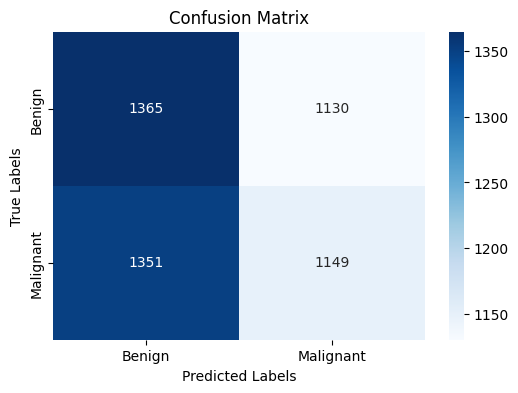

              precision    recall  f1-score   support

      benign       0.50      0.55      0.52      2495
   malignant       0.50      0.46      0.48      2500

    accuracy                           0.50      4995
   macro avg       0.50      0.50      0.50      4995
weighted avg       0.50      0.50      0.50      4995



In [33]:


conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_true, y_pred, target_names=class_names)
print(report)



AUC Score: 0.51


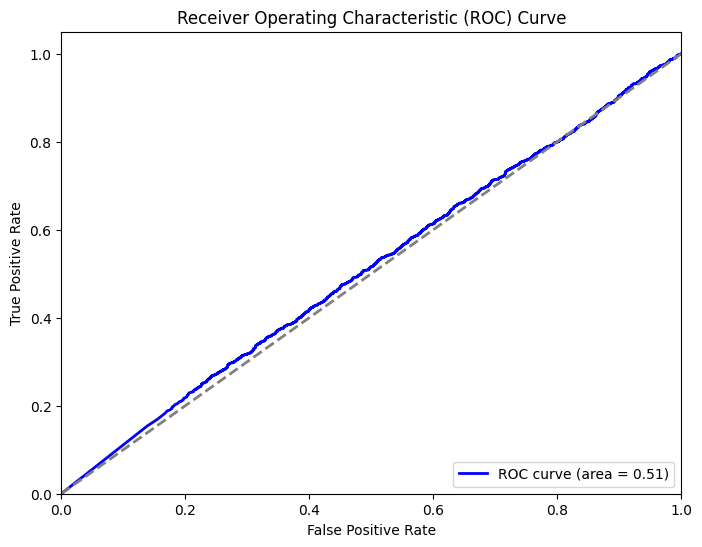

In [ ]:
auc_score = roc_auc_score(y_true, y_pred_probs)
print(f"AUC Score: {auc_score:.2f}")

fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# VGG16 Model

In [14]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model.layers:
    layer.trainable = False


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [ ]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)  
x = Dropout(0.5)(x)  
output = Dense(1, activation='sigmoid')(x)  


model = Model(inputs=base_model.input, outputs=output)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    r'C:\IP\archive (1)\melanoma_cancer_dataset\train_augmented',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    r'C:\IP\archive (1)\melanoma_cancer_dataset\test_augmented',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 47895 images belonging to 2 classes.
Found 4995 images belonging to 2 classes.


In [20]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=test_generator.samples // test_generator.batch_size
)


c:\IP\my_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 1884s 1s/step - accuracy: 0.7736 - loss: 0.4676 - val_accuracy: 0.8413 - val_loss: 0.3338
Epoch 2/10
   1/1496 ━━━━━━━━━━━━━━━━━━━━ 44:14 2s/step - accuracy: 0.8125 - loss: 0.3455

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1496/1496 ━━━━━━━━━━━━━━━━━━━━ 2s 213us/step - accuracy: 0.8125 - loss: 0.3455 - val_accuracy: 0.6667 - val_loss: 0.5812
Epoch 3/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 960s 641ms/step - accuracy: 0.8232 - loss: 0.3889 - val_accuracy: 0.8578 - val_loss: 0.3093
Epoch 4/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 0s 47us/step - accuracy: 0.9375 - loss: 0.2852 - val_accuracy: 1.0000 - val_loss: 0.1909
Epoch 5/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 904s 604ms/step - accuracy: 0.8308 - loss: 0.3735 - val_accuracy: 0.8540 - val_loss: 0.3163
Epoch 6/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 1s 52us/step - accuracy: 0.8125 - loss: 0.4371 - val_accuracy: 0.3333 - val_loss: 0.5952
Epoch 7/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 811s 542ms/step - accuracy: 0.8296 - loss: 0.3695 - val_accuracy: 0.8588 - val_loss: 0.3059
Epoch 8/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 0s 50us/step - accuracy: 0.8125 - loss: 0.5562 - val_accuracy: 1.0000 - val_loss: 0.0804
Epoch 9/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 715s 478ms/step - accuracy: 0.8359 - loss:

In [21]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.2f}')


157/157 ━━━━━━━━━━━━━━━━━━━━ 88s 564ms/step - accuracy: 0.8555 - loss: 0.3293
Test Accuracy: 0.86


# VGG 19 Model

In [1]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [ ]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model.layers:
    layer.trainable = False


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)  
x = Dropout(0.5)(x)  
output = Dense(1, activation='sigmoid')(x)  


model = Model(inputs=base_model.input, outputs=output)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             

 Total params: 24,219,713 (92.39 MB)

 Trainable params: 4,195,329 (16.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    r'archive (1)/melanoma_cancer_dataset/train_augmented',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    r'archive (1)/melanoma_cancer_dataset/test_augmented',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 47895 images belonging to 2 classes.
Found 4995 images belonging to 2 classes.


In [6]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=test_generator.samples // test_generator.batch_size
)


c:\IP\my_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 0s 824ms/step - accuracy: 0.7676 - loss: 0.4785

c:\IP\my_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1496/1496 ━━━━━━━━━━━━━━━━━━━━ 1310s 874ms/step - accuracy: 0.7676 - loss: 0.4785 - val_accuracy: 0.8417 - val_loss: 0.3462
Epoch 2/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 1s 73us/step - accuracy: 0.8438 - loss: 0.3176 - val_accuracy: 1.0000 - val_loss: 0.1561
Epoch 3/10


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1496/1496 ━━━━━━━━━━━━━━━━━━━━ 1557s 1s/step - accuracy: 0.8113 - loss: 0.4050 - val_accuracy: 0.8504 - val_loss: 0.3389
Epoch 4/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 2s 120us/step - accuracy: 0.8125 - loss: 0.3657 - val_accuracy: 1.0000 - val_loss: 0.0151
Epoch 5/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 1340s 895ms/step - accuracy: 0.8168 - loss: 0.3918 - val_accuracy: 0.8556 - val_loss: 0.3327
Epoch 6/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 1s 66us/step - accuracy: 0.6875 - loss: 0.5588 - val_accuracy: 1.0000 - val_loss: 0.1317
Epoch 7/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 1747s 1s/step - accuracy: 0.8169 - loss: 0.3872 - val_accuracy: 0.8576 - val_loss: 0.3291
Epoch 8/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 1s 122us/step - accuracy: 0.8438 - loss: 0.4007 - val_accuracy: 1.0000 - val_loss: 0.3414
Epoch 9/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 1193s 797ms/step - accuracy: 0.8191 - loss: 0.3814 - val_accuracy: 0.8550 - val_loss: 0.3378
Epoch 10/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 1s 52us/step - accuracy: 0.7812 - loss:

In [7]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.2f}')


157/157 ━━━━━━━━━━━━━━━━━━━━ 113s 718ms/step - accuracy: 0.8547 - loss: 0.3523
Test Accuracy: 0.85


In [ ]:
from rich.console import Console
from rich.table import Table

console = Console()

table = Table(title="Model Performance Comparison", style="yellow")

table.add_column("Model Name", style="bright_white", justify="center")
table.add_column("Accuracy", style="green", justify="center")

table.add_row("RGB Original Dataset Model", "89%")
table.add_row("Greyscale Original Dataset Model", "89%")
table.add_row("Greyscale Augmented Dataset Model", "88%")
table.add_row("RGB Augmented Dataset Model", "91%")
table.add_row("VGG16", "86%")
table.add_row("VGG19", "85%")

console.print(table)


          Model Performance Comparison          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃            Model Name             ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│    RGB Original Dataset Model     │   89%    │
│ Greyscale Original Dataset Model  │   89%    │
│ Greyscale Augmented Dataset Model │   88%    │
│    RGB Augmented Dataset Model    │   91%    │
│               VGG16               │   86%    │
│               VGG19               │   85%    │
└───────────────────────────────────┴──────────┘